<a href="https://colab.research.google.com/github/agrpriyank2807/corrosion_detection/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
!pip install -q -U keras-tuner
from kerastuner.tuners import RandomSearch
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

We are now importing the cleaned dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Project_Files/data_cleaned_final_edited')

In [ ]:
data=data.drop(columns='Unnamed: 0')
data.head()

,Environment,Material Group,Material Family,Material,Concentration,Temperature,Duration,Rate
0,0,10,4,49,100.0,61.0,9936.0,1
1,0,10,4,55,70.0,118.0,4056.0,3
2,0,10,4,55,70.0,104.0,2400.0,0
3,0,10,4,55,50.0,92.0,5904.0,0
4,0,10,4,55,50.0,92.0,1944.0,1


In [ ]:
data.describe()

,Environment,Material Group,Material Family,Material,Concentration,Temperature,Duration,Rate
count,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000
mean,58.460755,7.922496,15.907389,138.422332,36.615103,93.217143,1062.243048,2.041379
std,26.875232,2.578575,13.733979,90.133590,31.335620,89.972165,2297.167449,1.105889
min,0.000000,0.000000,0.000000,0.000000,0.000000,-27.100000,1.000000,0.000000
25%,41.000000,7.000000,4.000000,55.000000,10.000000,42.500000,24.000000,1.000000
50%,67.000000,8.000000,13.000000,116.000000,25.000000,80.000000,168.000000,3.000000
75%,78.000000,10.000000,29.000000,221.000000,60.000000,114.500000,996.000000,3.000000
max,91.000000,10.000000,49.000000,328.000000,357.500000,1327.000000,28272.000000,3.000000


In [ ]:
data['Rate'].unique()

array([1, 3, 0, 2])

Now we have divided our dataset into features and labels. Then we have label encoded the Rate, Environment, Material group, Material Family, Material into vector notation, since we have multiclass classification. This is done using one hot encoding. Then we have divided our dataset into train and test data.

In [ ]:
X = data.drop(columns = ['Rate']) #Independent_features
y = data['Rate'] #Dependent_features
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)
X1=data['Environment']
X2=data['Material Group']
X3=data['Material Family']
X4=data['Material']
encoder.fit(X1)
encoder.fit(X2)
encoder.fit(X3)
encoder.fit(X4)
encoded_X1 = encoder.transform(X1)
encoded_X2 = encoder.transform(X2)
encoded_X3 = encoder.transform(X3)
encoded_X4 = encoder.transform(X4)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_X1 = pd.DataFrame(np_utils.to_categorical(encoded_X1))
dummy_X2 = pd.DataFrame(np_utils.to_categorical(encoded_X2))
dummy_X3 = pd.DataFrame(np_utils.to_categorical(encoded_X3))
dummy_X4 = pd.DataFrame(np_utils.to_categorical(encoded_X4))
X=pd.concat([dummy_X1,dummy_X2,dummy_X3,dummy_X4,data['Concentration'],data['Temperature'],data['Duration']],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.15, random_state = 0)

In [ ]:
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Epoch 1/200
440/440 [==============================] - 2s 3ms/step - loss: 1.2037 - accuracy: 0.5052 - val_loss: 0.9945 - val_accuracy: 0.5424
Epoch 2/200
440/440 [==============================] - 1s 3ms/step - loss: 0.9718 - accuracy: 0.5685 - val_loss: 0.9577 - val_accuracy: 0.6735
Epoch 3/200
440/440 [==============================] - 1s 3ms/step - loss: 0.9224 - accuracy: 0.6579 - val_loss: 1.0328 - val_accuracy: 0.6658
Epoch 4/200
440/440 [==============================] - 1s 3ms/step - loss: 0.8798 - accuracy: 0.6965 - val_loss: 0.8743 - val_accuracy: 0.6992
Epoch 5/200
440/440 [==============================] - 1s 3ms/step - loss: 0.8262 - accuracy: 0.6915 - val_loss: 0.8619 - val_accuracy: 0.7147
Epoch 6/200
440/440 [==============================] - 1s 3ms/step - loss: 0.7878 - accuracy: 0.6926 - val_loss: 0.8698 - val_accuracy: 0.7224
Epoch 7/200
440/440 [==============================] - 1s 3ms/step - loss: 0.7553 - accuracy: 0.7156 - val_loss: 0.8404 - val_accuracy: 0.7404

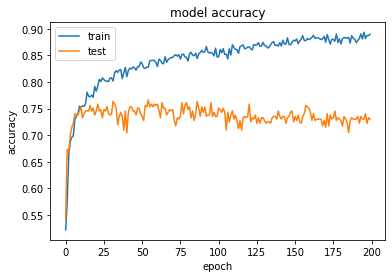

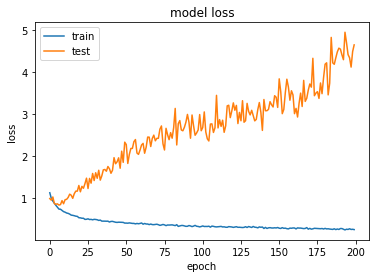

The confusion matrix is: [[ 31   7   2   4]
 [  9  91   6  22]
 [  2   4   8  19]
 [ 11  26  12 203]]
The accuracy score with test data is= 0.7221006564551422


In [ ]:
# Initialising the ANN
classifier_1 = Sequential()

# Adding the input layer and the first hidden layer
classifier_1.add(Dense(units = 512, kernel_initializer = 'uniform',activation='relu',input_dim = 485))
classifier_1.add(Dropout(0.2))
# Adding the second hidden layer
classifier_1.add(Dense(units = 32, kernel_initializer = 'uniform',activation='relu'))
classifier_1.add(Dropout(0.2))
classifier_1.add(Dense(units = 32, kernel_initializer = 'uniform',activation='relu'))
classifier_1.add(Dropout(0.2))
classifier_1.add(Dense(units = 32, kernel_initializer = 'uniform',activation='relu'))
# classifier.add(Dropout(0.2))
classifier_1.add(Dense(units = 32, kernel_initializer = 'uniform',activation='relu'))
# Adding the output layer
classifier_1.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN

classifier_1.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier_1.fit(X_train, y_train,validation_split = 0.15, batch_size =5, epochs = 200)

# list all data in history

print(model_history.history.keys())
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier_1.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("The confusion matrix is:",cm) ##plot confusion matrix
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print("The accuracy score with test data is=",score)

# estimator = KerasClassifier(build_fn=classifier, epochs= 30, batch_size=5, verbose=0)
# kfold = KFold(n_splits=10, shuffle=True)
# results = cross_val_score(estimator, X_test, y_test, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Using Hyperparameter tuning we will find out

1. How many number of hidden layers we should have?
2. How many number of neurons we should have in hidden layers?
3. Learning rate?










In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
            loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Corrosion_Prediction_3')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [ ]:
tuner.search(X_train, y_train,
             epochs=200,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 10m 03s]
val_accuracy: 0.7432530919710795

Best val_accuracy So Far: 0.7673231164614359
Total elapsed time: 00h 32m 16s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in project/Corrosion_Prediction_3
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 3
units_0: 224
units_1: 352
learning_rate: 0.0001
units_2: 416
units_3: 96
units_4: 128
units_5: 160
units_6: 416
units_7: 224
Score: 0.7673231164614359
Trial summary
Hyperparameters:
num_layers: 10
units_0: 96
units_1: 96
learning_rate: 0.001
units_2: 320
units_3: 160
units_4: 512
units_5: 320
units_6: 128
units_7: 192
units_8: 512
units_9: 224
units_10: 288
units_11: 128
units_12: 224
units_13: 96
units_14: 128
units_15: 192
Score: 0.7432530919710795
Trial summary
Hyperparameters:
num_layers: 16
units_0: 160
units_1: 480
learning_rate: 0.001
units_2: 320
units_3: 32
units_4: 352
units_5: 224
units_6: 192
units_7: 288
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
Score: 0.6936542789141337
Trial summary
Hyperparameters:
num_layers: 8
units_0: 256
units_1: 416
le

After tuning the ANN with the above parameters

Epoch 1/100
207/207 [==============================] - 4s 15ms/step - loss: 1.3790 - accuracy: 0.5078 - val_loss: 1.2451 - val_accuracy: 0.5386
Epoch 2/100
207/207 [==============================] - 3s 13ms/step - loss: 1.1777 - accuracy: 0.5261 - val_loss: 1.1080 - val_accuracy: 0.5386
Epoch 3/100
207/207 [==============================] - 3s 13ms/step - loss: 1.1290 - accuracy: 0.5356 - val_loss: 1.1114 - val_accuracy: 0.5386
Epoch 4/100
207/207 [==============================] - 3s 13ms/step - loss: 1.1506 - accuracy: 0.5322 - val_loss: 1.0967 - val_accuracy: 0.5386
Epoch 5/100
207/207 [==============================] - 3s 13ms/step - loss: 1.1420 - accuracy: 0.5199 - val_loss: 1.1003 - val_accuracy: 0.5386
Epoch 6/100
207/207 [==============================] - 3s 13ms/step - loss: 1.1271 - accuracy: 0.5347 - val_loss: 1.0986 - val_accuracy: 0.5386
Epoch 7/100
207/207 [==============================] - 3s 13ms/step - loss: 1.1368 - accuracy: 0.5190 - val_loss: 1.1018 - val_accuracy:

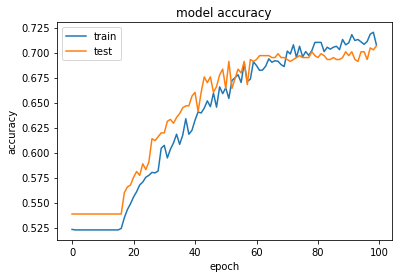

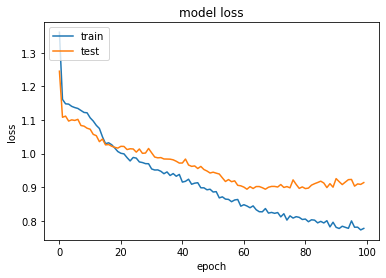

The confusion matrix is: [[ 13  25   0   6]
 [ 26  87   0  15]
 [  8   8   0  17]
 [ 38  24   0 190]]
The accuracy score with test data is= 0.6061269146608315


In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 192, kernel_initializer = 'uniform',activation='relu',input_dim = 485))
classifier.add((Dropout(0.3)))
# Adding the second hidden layer
classifier.add(Dense(units = 224, kernel_initializer = 'uniform',activation='relu'))

classifier.add(Dense(units = 480, kernel_initializer = 'uniform',activation='relu'))
classifier.add((Dropout(0.3)))
classifier.add(Dense(units = 224, kernel_initializer = 'uniform',activation='relu'))

classifier.add(Dense(units = 448, kernel_initializer = 'uniform',activation='relu'))
classifier.add((Dropout(0.3)))
classifier.add(Dense(units = 352, kernel_initializer = 'uniform',activation='relu'))
classifier.add((Dropout(0.2)))
classifier.add(Dense(units = 96, kernel_initializer = 'uniform',activation='relu'))

classifier.add(Dense(units = 288, kernel_initializer = 'uniform',activation='relu')) 
classifier.add((Dropout(0.2)))
classifier.add(Dense(units = 96, kernel_initializer = 'uniform',activation='relu'))
classifier.add(Dense(units = 256, kernel_initializer = 'uniform',activation='relu'))
classifier.add((Dropout(0.3)))
classifier.add(Dense(units = 256, kernel_initializer = 'uniform',activation='relu'))
classifier.add(Dense(units = 480, kernel_initializer = 'uniform',activation='relu'))
classifier.add((Dropout(0.3)))
classifier.add(Dense(units = 224, kernel_initializer = 'uniform',activation='relu'))
classifier.add(Dense(units = 192, kernel_initializer = 'uniform',activation='relu'))
classifier.add((Dropout(0.2)))
classifier.add(Dense(units = 64, kernel_initializer = 'uniform',activation='relu'))
classifier.add(Dense(units = 384, kernel_initializer = 'uniform',activation='relu'))
classifier.add((Dropout(0.3)))





# Adding the output layer
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
adm = tf.keras.optimizers.Adamax(learning_rate=0.0001)
classifier.compile(optimizer = adm, loss='CategoricalCrossentropy', metrics = ['accuracy'])
X_train=np.array(X_train)
y_train=np.array(y_train)
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.2, batch_size = 10, epochs = 100)

# list all data in history

print(model_history.history.keys())
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("The confusion matrix is:",cm)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print("The accuracy score with test data is=",score)

In [ ]:
roc_auc_score(y, classifier_1.predict_proba(X), multi_class='ovr')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.5769737380397184